# Graded Assignment 2 - Air quality and Covid in the Netherlands <span class="tocSkip"></span>


# Introduction to this template notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`, **renamed** to `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
* Keep the copy in the same folder, so that the provided data sets can be loaded.

You are expected to work with Python code in this notebook. The locations where you should write your solutions can be recognized by **marker lines**, which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">
<ul>
    <li>Do NOT modify or delete these marker lines.  Keep them as they are.</li>
    <li>NEVER write code <i>outside</i> the marked blocks. Such code cannot be evaluated.</li>
</ul>
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

## Personalize your notebook

1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name, identification number,_ and the current _date_ (i.e. when you first modified this notebook, e.g. `'2020-02-26'`) as strings between quotes.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Toma Andrei Sacuiu'
AUTHOR_ID_NR = '1681591'
AUTHOR_DATE = '2022-03-30'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Toma Andrei Sacuiu', '1681591', '2022-03-30')

# Organizational matters

Welcome to the second graded assignment of the course Data Analytics
for Engineers! This assignment consists of three parts:

1. Guided exploration of the data set, based on answering the questions in the notebook below.
2. Formulating and testing a hypothesis.
3. Creation of a **poster** on which you report and discuss your findings.

> **Note:** you are required to use the template provided on Canvas for the poster.

The deadline for the graded assignment, involving both the submission of this notebook and your poster, is **Friday April 1 at 21:00**.

Your assignment will be graded on three components: the work in this notebook, graded by Momotor, your poster and the peer review. For the precise assessment criteria, see the [study guide on Canvas](https://canvas.tue.nl/courses/18905/pages/study-guide-2iab0-data-analytics-for-engineers).

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b> 
    
1. Make sure that the **visualizations that you include in your poster**, are also produced by your notebook. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab, i.e. make sure that every visualization on your poster can also be seen under that tab.
2. Submit your notebook already before the deadline and make sure **Momotor does not give any errors in any tab**.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.
</div>


# Introduction

In the DAE graded assignments we investigate how the Corona pandemic influences our behavior and the environment. In the previous graded assignment, we have seen that there was less traffic in the Netherlands, especially during the first lockdown in the pandemic. In this graded assignment we will focus on changes in the air quality after the start of the Corona pandemic. In particular, we will investigate whether the air quality in the Netherlands was better during the Corona pandemic than before.

To do so, we make use of data from [luchtmeetnet](https://www.luchtmeetnet.nl), which collects and makes available data on the concentration of substances in the air.

In the database that is provided with this assignment, there is also information on the weather in the Netherlands in the same time period. 

## Problem statement

Was the air quality in the Netherlands better during the Corona pandemic than before?

## Personalization

This assignment is personalized. You will focus on the measurements of one particular substance from one particular air-quality measurement station. Sometimes we will refer to the substance as your **quantity of interest** and we will abbreviate it as QoI. You should have received an e-mail containing a string that encodes the substance (i.e. the QoI) and the air quality measurement station.

**Important:** Store the string that encodes your quantity of interest and the id of your personal air-quality measurement station (that was assigned to you by e-mail) in the variable `QoI_station_id` (as a string). An example `QoI_station_id` is `NO_NL10235`, where everything in front of the underscore is the `QoI` (in the example it is `'NO'`), and everything after the underscore is the `station_id` (in the example it is `'NL10235'`). Store your QoI in the variable `QoI` and store your station id in the variable `station_id`.

In [2]:
#// BEGIN_TODO [Personalization] (1 point)

QoI_station_id = 'O3_NL10934'
QoI = 'O3'
station_id = 'NL10934'

#// END_TODO [Personalization]
QoI_station_id, QoI, station_id

('O3_NL10934', 'O3', 'NL10934')

The quantity of interest (QoI) that has been assigned to you will be one of the compounds in the next table. All concentrations are measured in $\mu \mathrm{g /m}^3$.

|Abbreviation  | Description | 
|:-------|:----|
|BC | soot |
|CO | carbon monoxide ($\mathrm{CO}$)|
|NO | nitrogen monoxide ($\mathrm{N} \mathrm{O}$) |
|NO2 | nitrogen dioxide ($\mathrm{N} \mathrm{O}_2$)|
|O3 | ozone ($\mathrm{O}_3$) |
|PM10 | particle matter (PM10) |
|PM25 | particle matter (PM2.5)  |
|SO2| Sulfur dioxide ($\mathrm{S}\mathrm{O}_2$) |

## Description of the dataset

The data for this assignment is stored in a database in `datasets/aq.db`. The database contains four tables.

### The `aq` table

The `aq` table contains measurements of concentrations of substances in the air.

|Column  | Type | Description | 
|:-------|:----|:----|
|time | datetime | The local time (in utc) **at the end** of the measurement period of one hour |
|*your QoI_station_id* | float | The concentration of your QoI expressed in $\mu \mathrm{g / m}^3$ measured at the local time |

### The `aq_levels` table

The `aq_levels` table gives for every substance discrete ratings that express how severe a certain concentration is.

|Column | Type | Description |
|:------|:-----|:------------|
|rating | int | the discrete level |
|BC | float | upper bound for this level for the concentration of soot in $\mu \mathrm{g / m}^3$|
|CO | float | upper bound for this level for the concentration of carbon monoxide ($\mathrm{CO}$) in $\mu \mathrm{g / m}^3$|
|NO | float | upper bound for this level for the concentration of nitrogen monoxide ($\mathrm{N} \mathrm{O}$) in $\mu \mathrm{g / m}^3$|
|NO2 | float | upper bound for this level for the concentration of nitrogen dioxide ($\mathrm{N} \mathrm{O}_2$) in $\mu \mathrm{g / m}^3$|
|O3 | float | upper bound for this level for the concentration of ozone ($\mathrm{O}_3$) in $\mu \mathrm{g / m}^3$|
|PM10 | float | upper bound for this level for the concentration of particle matter (PM10) in $\mu \mathrm{g / m}^3$|
|PM25 | float | upper bound for this level for the concentration of particle matter (PM2.5) in $\mu \mathrm{g / m}^3$|
|SO2 | float | upper bound for this level for the concentration of sulfur dioxide ($\mathrm{S}\mathrm{O}_2$ in $\mu \mathrm{g / m}^3$)|

### The `station_info` table

The `station_info` table contains for every `station_id` the longitude and latitude information about the particular air-quality measurement station.

|Column | Type | Description |
|:------|:-----|:------------|
|aq_id | string | the id of the air-quality measurement station |
|longitude | float | the longitude of the air-quality measurement station |
|latitude | float | the latitude of the air-quality measurement station |

### The `weather_de_bilt` table

The `weather_de_bilt` table contains weather information for the given time period. **Note the units in the descriptions.**

|Column | Type | Description |
|:------|:-----|:------------|
| time | datetime | The local time (in utc) at the end of the measurement period of one hour | 
| wind_direction | int | Wind direction (in degrees) averaged over the last 10 minutes of the last hour (360=north, 90=east, 180=south, 270=west, 0=wind still 990=changing |
| average_wind_speed | int | Hourly average wind speed (in 0.1 m/s) |
| wind_speed_previous_hour | int | Wind speed (in 0.1 m/s) averaged over the last 10 minutes of the last hour |
| highest_wind_gust | int | Highest gust of wind (in 0.1 m/s) over the last hour |
| temperature | int | Temperature (in 0.1 degrees Celsius) at 1.50 m altitude during observation |
| minimum_temp_10cm | int | Minimum temperature (in 0.1 degrees Celsius) at 10 cm altitude in the last 6 hours |
| dew_point_temperature | int | Dew point temperature (in 0.1 degrees Celsius) at 1.50 m elevation during observation |
| sunshine | int | Duration of sunshine (in 0.1 hours) per hour section, calculated from global radiation (-1 for <0.05 hours) |
| general_radiation | float | Global radiation (in J/cm2) over the last hour |
| duration_rainfall | int | Duration of precipitation (in 0.1 hours) over the previous hour |
| rainfall | int | Hourly sum of precipitation (in 0.1 mm) (-0.1 for <0.05 mm) |
| pressure | int | Air pressure (in 0.1 hPa) reduced to sea level, during observation |
| horizontal_view_distance | int | Horizontal visibility during observation (0=less than 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km,..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=more than 70km) |
| cloudiness | int | Overcast (degree of upper air cover in eighths), during observation (9 = upper air invisible) |
| relative_humidity | int | Relative humidity (in percent) at 1.50 m altitude during the observation |
| weather_code | int | Weather code (00-99), visually(WW) or automatically(WaWa) detected, for the current weather or the weather in the past hour. See http://bibliotheek.knmi.nl/scholierenpdf/weercodes_Nederland. |
| weather_code_observer | int | Weather code indicator for the mode of observation on a manned or automatic station (1=manned using code from visual observations, 2,3=manned and omitted (no significant weather event, no data), 4=automatic and recorded (using code from visual observations), 5,6=automatic and omitted (no significant weather event, no data), 7=automatic using code from automatic observations) |
| fog | int | Fog 0=not occurred, 1=did occur in the previous hour and/or during observation |
| rain | int | Rain 0=not occurred, 1=did occur in the previous hour and/or during the observation |
| snow | int | Snow 0=not occurred, 1=did occur in the previous hour and/or during the observation |
| storm | int | Thunderstorm 0=not occurred, 1=did occur in the preceding hour and/or during observation |
| ice | int | Ice forming 0=not occurred, 1=did occur in the previous hour and/or during observation |

### The `stringency_index` table

The `stringency_index` table contains the stringency index for the given time period according to the [COVID-19 Oxford government response tracker](https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker).

|Column | Type | Description |
|:------|:-----|:------------|
| Date | datetime | The start time of the day | 
| StringencyIndex | int | The Oxford stringency index on that day |

---

## Loading the libraries

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import *
import sqlite3

from sklearn.linear_model import LinearRegression
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split
from treeviz import tree_print  # to print decision tree

from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

# Extract data

1. Connect to the SQLite database in the `'datasets/aq.db'` file. Use an SQL query to retrieve from the `aq` table a dataframe with the concentrations of your QoI at your air quality measurement station. Store the query in a variable `query_aq`. Store the dataframe in the variable `df_aq`. Make sure the table is indexed by the time column and that the times are parsed as dates (**Hint:** pass for instance the keyword argument `parse_dates=['time']` to the `read_sql_query` function). Make sure that the column with the concentrations is labeled by the value of your `QoI_station_id`.

In [4]:
#// BEGIN_TODO [Extract] (3 points)

#connection to the database
con_db = sqlite3.connect('datasets/aq.db')

#the SQL query needed
query_aq = '''
    SELECT time, O3_NL10934
    FROM aq
'''

df_aq = pd.read_sql_query(query_aq, con_db, parse_dates = ['time'])

#setting the index by time
df_aq = df_aq.set_index('time')

In [5]:
df_aq
#// END_TODO [Extract]

,O3_NL10934
time,
2014-01-01 01:00:00+00:00,31.31
2014-01-01 02:00:00+00:00,34.37
2014-01-01 03:00:00+00:00,34.30
2014-01-01 04:00:00+00:00,37.59
2014-01-01 05:00:00+00:00,41.06
...,...
2021-12-31 19:00:00+00:00,49.40
2021-12-31 20:00:00+00:00,49.99
2021-12-31 21:00:00+00:00,50.98


# Data quality

Before working with the data, let us first check whether it meets our expectations. Before the data gets published on [luchtmeetnet](https://www.luchtmeetnet.nl), it actually gets [validated](https://www.luchtmeetnet.nl/informatie/overige/validatie-data). That means that the data is most likely clean, except there can still be missing values. We will check if this is the case.

1. For your `QoI_station_id`, determine for how many hours in the period 2014-2021 the air quality data is missing (i.e. it is given by a `NaN` in the table). Store your answer in a variable `nr_aq_missing`.

In [6]:
#// BEGIN_TODO [Missing_data] (2 points)

nr_aq_missing = df_aq[df_aq['O3_NL10934'].isnull()].count(axis = 1).count()

In [7]:
#// END_TODO [Missing_data]
nr_aq_missing

2436

2. The `aq_levels` table in the database gives for every substance discrete ratings that give an expert indication on how high a certain concentration is. Use an SQL query `query_ratings` to extract all ratings (so not only for your QoI but for every substance) and store it in a dataframe `df_ratings`. Make sure the dataframe is indexed by the `rating`. Make sure the column names in `df_ratings` correspond to the names of the various substances.

In [8]:
#// BEGIN_TODO [Get_levels] (2 points)

query_ratings = '''
    SELECT *
    FROM aq_levels
'''

df_ratings = pd.read_sql_query(query_ratings, con_db).set_index('rating')

In [9]:
df_ratings
#// END_TODO [Get_levels]

,C6H6,C7H8,CO,BC,NO,NO2,O3,PM10,PM25,SO2
rating,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0
1,2,2,250,1,10,10,15,10,10,10
2,4,4,500,3,25,20,30,20,15,15
3,5,5,1000,4,50,30,40,30,20,20
4,10,10,1500,6,100,45,60,45,30,100
5,15,20,2000,8,150,60,80,60,40,200
6,20,40,3000,10,200,75,100,75,50,350
7,30,60,5000,15,400,100,140,100,70,375
8,50,75,10000,20,600,125,180,125,90,400


3. Let us check whether the concentration measurements of your QoI at your station are within the range of the corresponding ratings. Add a column labeled `'less_than_zero'` to the dataframe `df_aq` with boolean values that correspond to whether the concentration is **strictly less than** `0`. Also add a column labeled `'larger_than_rating_12'` that corresponds to whether the concentration is strictly larger than the rating listed under rating `12`. Store the total number of strictly negative measurements in a variable `nr_less_than_zero`. Store the total number of measurements with values strictly larger than the one corresponding to rating 12 in the variable `nr_larger_than_rating_12`. Finally, replace all values for which the concentration is **strictly less than** 0 by the value `0`. Replace all values for which the concentration is larger than the rating corresponding to rating `12` by `NaN`s.

  It is rather surprising that negative values appear in the first place, since after all, the data was validated. The reason is explained [here](https://www.luchtmeetnet.nl/informatie/overige/negatieve-waarden) (unfortunately in Dutch only). 

In [10]:
#// BEGIN_TODO [Check_expectations] (5 points)

# adding the column with boolean values
df_aq['less_than_zero'] = (df_aq[QoI_station_id] < 0)
df_aq['larger_than_rating_12'] = (df_aq[QoI_station_id] > 10 ** 10)

#storing the number of elements in the newly created columns
nr_less_than_zero = df_aq[df_aq['less_than_zero']]['less_than_zero'].count()
nr_larger_than_rating_12 = df_aq[df_aq['larger_than_rating_12']]['larger_than_rating_12'].count()

#replacing all values by 0 or NaN, depending on the case
df_aq.loc[df_aq[df_aq['less_than_zero']].index, [QoI_station_id]] = 0
df_aq.loc[df_aq[df_aq['larger_than_rating_12']].index, [QoI_station_id]] = np.NaN

In [11]:
nr_less_than_zero, nr_larger_than_rating_12
#// END_TODO [Check_expectations]

(436, 0)

We are now going to do some processing to help you with the next exercise. We first add a new column to `df_aq` that (roughly) indicates whether the date occurred before or after the onset of the Corona pandemic. 

In [12]:
df_aq['before_corona'] = (df_aq.index < pd.to_datetime('2020-03-01', utc=True))

Next we add a column `'rating'` to `df_aq` that assigns to every row the corresponding discrete rating for the substance concentration (based on the dataframe `df_ratings` that you created earlier).

In [13]:
rating_bins = df_ratings[QoI]
rating_bins.iloc[0] = -0.0001
df_aq['rating'] = pd.cut(df_aq[QoI_station_id], bins=rating_bins, labels=range(1,13))

4. In this exercise, we are going to see for each of the ratings, the fraction of the hours from Jan 2014 and February 2020 that fall into that rating, and the same for the hours from March 2020 up to and including December 2021. Create a dataframe called `df_aq_rating_fractions` that is indexed by the rating and has two columns labeled `'before_corona'` and `'after_corona'`. An element in the column `'before_corona'` should contain for that rating the total number of hours before Corona with that rating, divided by the total number of hours before Corona with a non-NaN rating. Similarly, an element in the column `'after_corona'` should contain for that rating the total number of hours after Corona with that rating, divided by the total number of hours after Corona with a non-NaN rating. Finally make a heatmap of `df_aq_rating_fractions`.

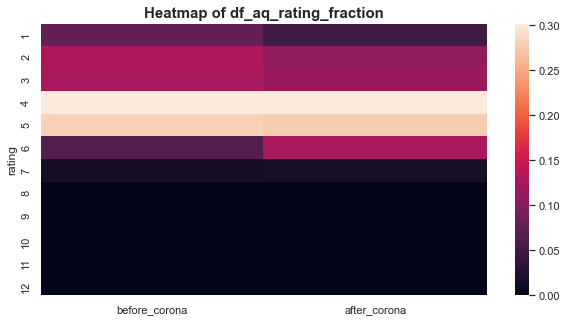

In [14]:
#// BEGIN_TODO [Discretization] (6 points)

#creating a data frame and a copy
df_aq_rating_fractions_copy = pd.DataFrame()
df_aq_rating_fractions = pd.DataFrame()

df_aq_rating_fractions_copy = df_aq[df_aq['before_corona']].groupby('rating')[['before_corona']].count()

df_aq_rating_fractions_copy['each_rating_after_corona'] = df_aq[df_aq['before_corona'] == False].groupby('rating')[['before_corona']].count()

df_aq_rating_fractions_copy = df_aq_rating_fractions_copy.rename(columns = {"before_corona":"each_rating_before_corona"})

df_aq_rating_fractions_copy['total_before_corona'] = df_aq_rating_fractions_copy['each_rating_before_corona'].sum()
df_aq_rating_fractions_copy['total_after_corona'] = df_aq_rating_fractions_copy['each_rating_after_corona'].sum()

df_aq_rating_fractions_copy['before_corona'] = df_aq_rating_fractions_copy['each_rating_before_corona'] / df_aq_rating_fractions_copy['total_before_corona']
df_aq_rating_fractions_copy['after_corona'] = df_aq_rating_fractions_copy['each_rating_after_corona'] / df_aq_rating_fractions_copy['total_after_corona']

#creating the heatmap
df_aq_rating_fractions[['before_corona', 'after_corona']] = df_aq_rating_fractions_copy[['before_corona', 'after_corona']].copy()
ax1 = sns.heatmap(data = df_aq_rating_fractions);
ax1.set_title('Heatmap of df_aq_rating_fraction', weight = 'bold', size = 15);

In [15]:

#// END_TODO [Discretization]

# Temporal features and filtering

## Temporal features

1. In which consecutive time period of 168 hours (the number of hours in a week) was the average concentration of your substance the lowest? Store the end time of that time period (as a Timestamp object) in the variable `end_period_lowest`. In which consecutive time period of 168 hours was the average concentration of your substance the highest? Store the end time of that time period (as a Timestamp object) in the variable `end_period_highest`. (**Hint:** if you select an element from the index, it will be such a Timestamp object).

Note: We choose a period of a week to not measure effects of for instance week days vs weekends: there are always week days and a weekend in any given period of 168 hours.

In [16]:
#// BEGIN_TODO [Lowest_and_highest] (6 points)

end_period_lowest = df_aq[QoI_station_id].rolling(168).mean().idxmin()

end_period_highest = df_aq[QoI_station_id].rolling(168).mean().idxmax()

In [17]:
end_period_lowest, end_period_highest
#// END_TODO [Lowest_and_highest]

(Timestamp('2014-11-18 01:00:00+0000', tz='UTC'),
 Timestamp('2014-07-24 22:00:00+0000', tz='UTC'))

## Explicit filtering

In the following couple of exercises, we will use Gaussian filtering to get an impression of the trends over time of the concentration of your quantity of interest. However, we first need to preprocess the data, because otherwise the Gaussian filter cannot deal with the `NaN` values in the data.

1. Add a column with the name `'interpolated'` to the dataframe `df_aq` in which you use linear interpolation to fill in the data that is missing.

**Hint:** If the variable `se` is a *Pandas* series, then `se.interpolate()` yields the series except with all `NaN`s filled by linear interpolation.

In [18]:
#// BEGIN_TODO [Interpolation] (2 points)

df_aq['interpolated'] = df_aq[QoI_station_id].interpolate()

#// END_TODO [Interpolation]

2. Do you feel that the interpolated data is realistic? Create one or more line plots by plotting the original data on top of the interpolated data to get an impression. What realistic aspects do you see? What unrealistic aspects do you see? Store your answer in a string `evaluation_interpolation`.

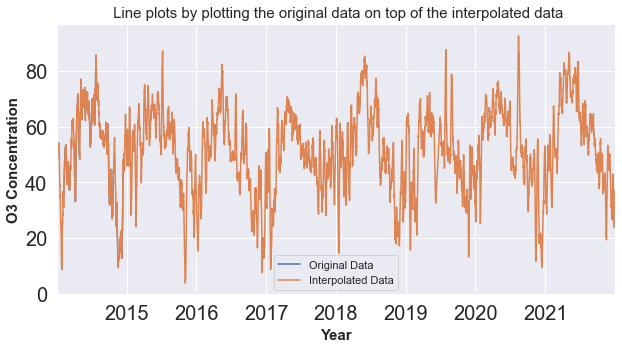

In [19]:
#// BEGIN_TODO [Evaluation_interpolation] (2 points)

#create the plot
ax2 = df_aq[QoI_station_id].rolling(168).mean().plot()
interpolated_data = df_aq['interpolated'].rolling(168).mean().plot(ax = ax2)

#edit the plot with legend, labels, etc
ax2.legend(['Original Data', 'Interpolated Data']);
ax2.set_xlabel('Year', weight = 'bold', size = 15);
ax2.set_ylabel('O3 Concentration', weight = 'bold', size = 15);
ax2.tick_params(labelsize = 20);
ax2.set_title(' Line plots by plotting the original data on top of the interpolated data', size = 15);

#observation
evaluation_interpolation = '''Based on the generated plot, we may observe that the interpolated data seems very realistic.
No unrealistic aspects can be observed. 
'''

#// END_TODO [Evaluation_interpolation]

3. Now we are ready to look at trends in the data by using Gaussian filtering. Choose a time span in days in the variable `time_span_days`. It is fine to choose a (somewhat reasonable) time span that you find interesting. Convert this time span to hours and store it in the variable `time_span`. Filter the *interpolated* data using a Gaussian filter with this time span, and add the result as a column with the label `'filtered'` to `df_aq`. Make a line plot of the filtered concentration. Also make a line plot in which you superimpose the data for the years 2014-2021: the $x$-axis should represent the day of the year and the $y$-axis should correspond the filtered concentration of the substance.

    What do you observe? In particular, do you see any differences before and after Corona? Store your answer as a string in the variable `observations_filtering`. 
       
    Note: we used a Gaussian filter so that in principle, if you feel like, with an easy variation of the method you could also compute (the approximate) derivative of the concentration of your QoI. You could use this in a plot or even to do hypothesis testing later.
  
To help you get started (for the plotting part), we first add a column with the year and the day of the year to the dataframe `df_aq`.

In [20]:
df_aq['day_of_year'] = df_aq.index.dayofyear
df_aq['year'] = df_aq.index.year

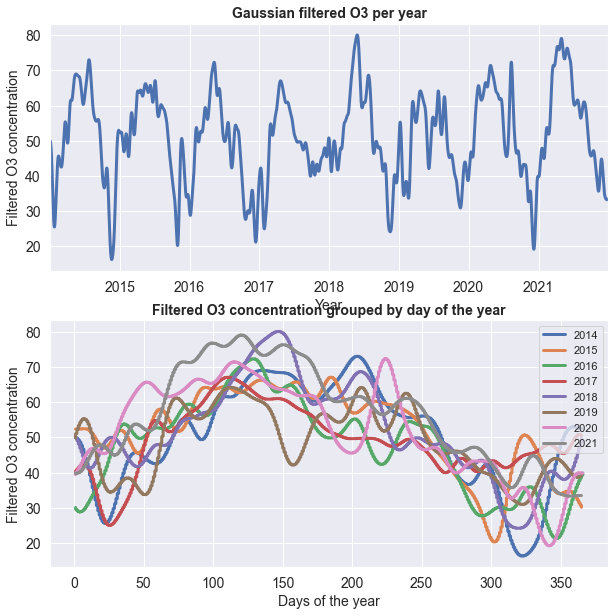

In [21]:
#// BEGIN_TODO [Filter] (6 points)

#choosing the time span
time_span_days = 7
time_span = 168

#add the results of the filter in column "filtered" to df_aq
df_aq['filtered'] = gaussian_filter1d(df_aq['interpolated'], sigma = 168)
#group by year
df_year_group = df_aq.groupby('year')

#creating the plots
fig1, ax3 = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))
df_aq['filtered'].plot(ax = ax3[0], linewidth = 3); 
df_year_group.plot(x = 'day_of_year', y = 'filtered', ax = ax3[1], linewidth = 3);

#edit the graph

ax3[0].set_xlabel('Year', size = 14);
ax3[0].set_ylabel('Filtered O3 concentration', size = 14);
ax3[0].tick_params(labelsize = 14);
ax3[0].set_title('Gaussian filtered O3 per year', size = 14, weight = 'bold');

ax3[1].legend(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']);
ax3[1].set_xlabel('Days of the year', size = 14)
ax3[1].set_ylabel('Filtered O3 concentration', size = 14);
ax3[1].tick_params(labelsize = 14);
ax3[1].set_title('Filtered O3 concentration grouped by day of the year', size = 14, weight = 'bold');

#ax3[0].set_xlim([2014, 2021])

#observation
observations_filtering =  ''' The graphs below do not show any difference in O3 concentration between the period before 
corona and the period after corona. The second graph though shows an interesting fact: in all years there is a drop during the 
final period of each year. Similarly, all lines have an increase during the middle period of the year.'''

In [22]:
ax3[0].get_figure().savefig('Gaussianfilter1.png')
ax3[1].get_figure().savefig('Gaussianfilter2.png')
#// END_TODO [Filter]

# Visualization

<div class="alert alert-block alert-danger"><b>IMPORTANT:</b>
    
For the rest of the assignment, work with the original data, i.e. the data in the column labeled with your `QoI_station_id`, rather than with the interpolated or filtered data.
</div>

In the next section, you will devise and execute your own hypothesis test. We will need to be a bit careful however in designing a good test. The hypothesis tests that we have seen in class assume independent data, and with time series data that we currently have that assumption is not really justified. One option to make the data a bit more independent is to prune the data first (only consider a subset of the data). (As an alternative to restriction, we could also have used a form of grouping the data.)

Moreover, there may (or may not) be also seasonal effects to the concentration of your QoI. To reduce the influence of such effects on the hypothesis test, one may want to restrict the data to a shorter time span, for instance just to April and May.

In the code below, we make an example restriction mask that allows for only taking into account that subset of the data measured in April or May and at noon (12:00 pm).

In [23]:
example_restriction_mask = (((df_aq.index.month == 4)
                    |(df_aq.index.month == 5))
                    &(df_aq.index.hour == 12))

1. Create your own restriction mask in the variable `restriction_mask`. Make a new dataframe `df_restricted` with exactly that subset of `df_aq` for which the restriction mask yields `True`. This restriction will be the basis of your hypothesis test below. You can also base your choice on the Oxford stringency index (which is given in the table `stringency_index`). Don't forget to explain your restriction on your poster.

In [24]:
#// BEGIN_TODO [Data_restriction] (3 points)

#create the restriction mask
restriction_mask = ((df_aq.index.month == 1) & (df_aq.index.hour == 18)) 

explain = '''I chose this month because during January is cold and people choose to commute by personal cars rather than taking
the public transport or taking the bike. I chose this hour because people usually depart from their jobs around 17-17:30 and 
there is clearly more traffic than other times of the day.
'''

#create the data frame using the restriction mask
df_restricted = pd.DataFrame()
df_restricted = df_aq[restriction_mask].copy()
df_restricted = df_restricted.drop(['interpolated', 'filtered'], axis = 1)

In [25]:
df_restricted
#// END_TODO [Data_restriction]

,O3_NL10934,less_than_zero,larger_than_rating_12,before_corona,rating,day_of_year,year
time,,,,,,,
2014-01-01 18:00:00+00:00,54.55,False,False,True,4,1,2014
2014-01-02 18:00:00+00:00,47.60,False,False,True,4,2,2014
2014-01-03 18:00:00+00:00,59.69,False,False,True,4,3,2014
2014-01-04 18:00:00+00:00,44.23,False,False,True,4,4,2014
2014-01-05 18:00:00+00:00,47.61,False,False,True,4,5,2014
...,...,...,...,...,...,...,...
2021-01-27 18:00:00+00:00,51.92,False,False,False,4,27,2021
2021-01-28 18:00:00+00:00,47.94,False,False,False,4,28,2021
2021-01-29 18:00:00+00:00,NaN,False,False,False,NaN,29,2021


2. Make a visualization of the restricted data, in which you contrast two situations, for instance the situation before corona and the situation after corona.

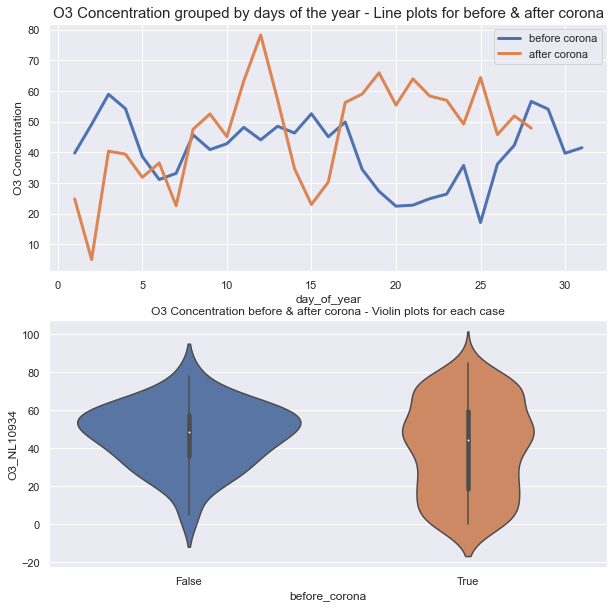

In [26]:
#// BEGIN_TODO [Violin_plot] (2 points)

# we create data before and after corona using the restricted data
data_corona_before = df_restricted[df_restricted['before_corona'] == True].groupby('day_of_year').mean()
data_corona_before = data_corona_before.drop(['year'], axis = 1)

data_corona_after = df_restricted[df_restricted['before_corona'] == False].groupby('day_of_year').mean()
data_corona_after = data_corona_after.drop(['year'], axis = 1)

# we now create the visualization

fig2, ax4 = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))

data_corona_before[QoI_station_id].plot(ax = ax4[0], linewidth = 3)
data_corona_after[QoI_station_id].plot(ax = ax4[0], linewidth = 3)
ax4[0].legend(['before corona', 'after corona']);
ax4[0].set_ylabel('O3 Concentration');
ax4[0].set_title('O3 Concentration grouped by days of the year - Line plots for before & after corona', size = 15)

sns.violinplot(ax = ax4[1], data = df_restricted, x = 'before_corona', y = QoI_station_id)
ax4[1].set_title('O3 Concentration before & after corona - Violin plots for each case');

In [27]:
ax4[0].get_figure().savefig('Violin1.png')
#// END_TODO [Violin_plot]

# Hypothesis test

1. Formulate a hypothesis about the concentration of your quantity of interest at your measurement station to some aspect of the Corona pandemic. Store your null hypothesis as a string in the variable `H_0` and store the alternative hypothesis in the variable `H_a`. 

In [28]:
#// BEGIN_TODO [Hypotheses] (1 point)

# The null hypothesis says there is no statistical significance between the two variables
H_0 = 'mu_O3_before_corona=mu_O3_after_corona'

# The alternative one is the opposite of the null one and tries to disprove it
H_a = 'mu_O3_before_corona<mu_O3_after_corona'

In [29]:
H_0, H_a
#// END_TODO [Hypotheses]

('mu_O3_before_corona=mu_O3_after_corona',
 'mu_O3_before_corona<mu_O3_after_corona')

2. Do you need that the data is normally distributed in order to test this hypothesis (with the method that you apply below)? Provide your answer as a boolean in the variable `need_normality` and provide an argumentation as a string in the variable `need_normality_argumentation`. If so, provide the $p$-value of the Anderson-Darling test for the samples before and after corona in the variables `p_ad_before` and `p_ad_after` respectively. Note that you may need to drop the `NaN`s first before you can actually apply the standard normality test (this can be done with the function `.dropna()`). Can you find a transformation so that the transformed data is approximately normally distributed?

In [30]:
#// BEGIN_TODO [Normality] (2 points)

#argumentation
need_normality_argumentation = '''Both samples are large enough (more than 50), 
hence checking for normality is not a necessity.
'''
#answer as a boolean
need_normality = False

sample_before = df_restricted[df_restricted['before_corona'] == True][QoI_station_id].dropna()
sample_after = df_restricted[df_restricted['before_corona'] == False][QoI_station_id].dropna()

#p-value for Anderson-Darling test before & corona data
p_ad_before = sm.stats.normal_ad(sample_before)
p_ad_after = sm.stats.normal_ad(sample_after)

#the log-transformed data
sample_before_log = np.log(sample_before)
sample_after_log = np.log(sample_after)

#Anderson-Darling tests for the log-transformed data
ad_before_log = sm.stats.normal_ad(sample_before_log)
ad_after_log = sm.stats.normal_ad(sample_after_log)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:47: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s


(2.664504794980445, 9.770049427269625e-07) (0.33517696218764925, 0.48509005088352997) (nan, 0.0) (1.7111049477874438, 0.0001654306635545672)


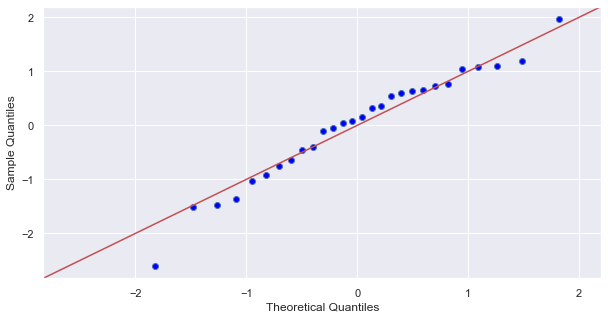

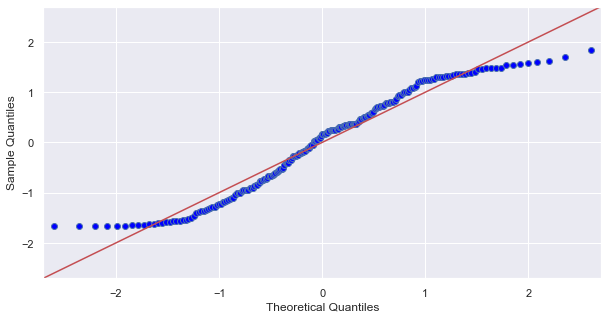

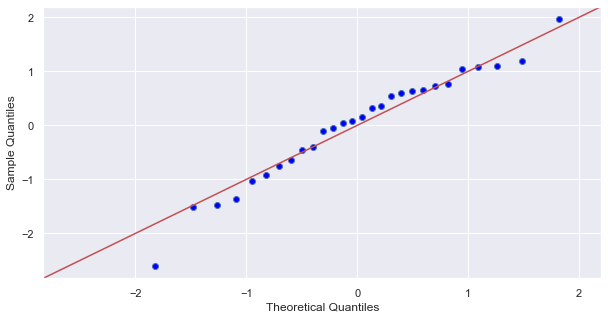

In [31]:
print(p_ad_before, p_ad_after, ad_before_log, ad_after_log)
#qqplots
sm.qqplot(sample_before, fit = True, line = '45')
sm.qqplot(sample_after, fit = True, line = '45')

#// END_TODO [Normality]

3. Test your hypothesis. Use the data in `df_restricted` for this test. Store the $p$-value of your hypothesis test in the variable `p_value`. Provide a confidence interval in the variable `conf_int`.

Again you may need to drop the `NaN`s with the function `.dropna()`.

In [32]:
#// BEGIN_TODO [Test_hypothesis] (6 points)

d_corona_before = sm.stats.DescrStatsW(sample_before)
d_corona_after = sm.stats.DescrStatsW(sample_after)

# creating the test object
cm_corona = sm.stats.CompareMeans(d_corona_before, d_corona_after)

# computing the p-value of the hypothesis test and providing the confidence level
p_value = cm_corona.ttest_ind(alternative = 'larger')[1]
conf_int = cm_corona.tconfint_diff(alpha = 0.05, alternative = 'larger')

In [33]:
p_value, conf_int
#// END_TODO [Test_hypothesis]

(0.9114512000554678, (-14.24432501791683, inf))

4. Discuss your hypothesis test. For instance, to what extent was it reasonable to assume that the measurement data was independently distributed? To what extent did the hypothesis test need that the data was normally distributed? Store your answer as a string in the variable `discussion_hypothesis_test`.

In [34]:
#// BEGIN_TODO [Discuss_hypothesis] (1 point)

discussion_hypothesis_test = '''Given the results, there is no numerical reason
that we should reject the null hyphothesis. In fact, we should consider the null
hypothesis as a possible representation of the reality. Since there is a lack of
numerical evidence to prove otherwise, the null hypothesis seems to be appropriate.'''


In [35]:
#// END_TODO [Discuss_hypothesis]

# Confounding factors

In the previous part of the assignment, you have conducted a hypothesis test on the concentration of your QoI before and after the start of the Corona pandemic. It is good to be critical about the validity of the obtained results. You have already discussed the test in the last part of the exercise, but in the final part of the assignment we indicate some other directions for reflection.

In this part you will explore some confounding factors which may have influenced the concentration of your substance at your measurement station. You may use these results in the discussion section on your poster.

## Confounding weather factors

1. Write a query to, in one go, obtain a dataframe `df_compare_weather`, with one column with the concentrations of your QoI at your station (with as column name the value of your `QoI_station_id`), and one column for a weather feature of your choice (with as column name the name under which it appears in the table in the database). Store the query in the variable `query_weather`. Make sure you parse the `'time'` column as dates and that the resulting dataframe is indexed by time. Next, make a visualization that relates the concentration of your substance of interest to a weather feature of your choice. Store the column name of the weather feature you have chosen as a string in the variable `column_name_weather_feature`. Store the number of rows of the dataframe in the variable `nr_rows_df_compare_weather`.

  **NOTE:** carefully check your answer yourself, i.e. check that your resulting dataframe is not way too large. In particular, the number of rows of `df_compare_weather` should not exceed 100000.

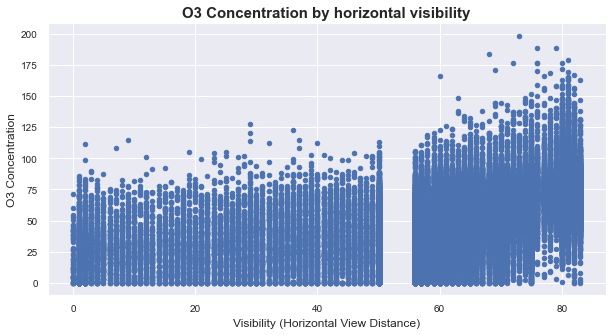

In [36]:
#// BEGIN_TODO [Weather] (4 points)

query_weather = '''
    SELECT horizontal_view_distance, time
    FROM weather_de_bilt
'''


df_compare_weather = pd.read_sql_query(query_weather,  con_db, parse_dates = ['time'])
df_compare_weather = df_compare_weather.set_index('time')
df_compare_weather[QoI_station_id] = df_aq[QoI_station_id].copy()

#df_compare_weather
#column name and number of rows
column_name_weather_feature = 'horizontal_view_distance'
nr_rows_df_compare_weather = 66456

ax5 = df_compare_weather.plot(kind = 'scatter', x = column_name_weather_feature, y = QoI_station_id, c = 'b');
ax5.set_ylabel('O3 Concentration');
ax5.set_xlabel('Visibility (Horizontal View Distance)')
ax5.set_title('O3 Concentration by horizontal visibility', weight = 'bold', size = 15)

#for clarity reasons
ax5.tick_params(labelsize = 10);

In [37]:

#// END_TODO [Weather]

## Gather information on the measurement location

1. Using SQL, obtain longitude and latitude information on your personal measurement location. Store your query as a string in the variable `query_station_info`. Store the longitude of the measurement station in the variable `longitude`, and store the latitude of the variable in the variable `latitude`. Enter the longitude and latitude on Google Maps. What can you say about the measurement location? Is it close to (large) roads? Is it close to industry? Give a description of the location (as a string) in the variable `description_location`.

In [38]:
#// BEGIN_TODO [Location_info] (4 points)

#creating the query string
query_station_info = '''
    SELECT longitude, latitude, aq_id
    FROM station_info
    WHERE aq_id = 'NL10934'
'''

df_station = pd.read_sql_query(query_station_info, con_db)

#getting the latitude and longitude
latitude = df_station.loc[0, 'latitude']
longitude = df_station.loc[0, 'longitude']

#description of the location
description_location = '''My station is located at the border between Friesland and Groningen. It is located right in the 
middle of a field and it seems considerably far away from any highway or city. Given this, the station is not severily
and directly affected by pollution. The location might explain many of the resulting statistics and plots.'''

In [39]:
latitude, longitude
#// END_TODO [Location_info]

(53.330425, 6.276815)

# Create your poster

Finally, create a poster on which you present and discuss your results. You can find more information on how to create your poster on Canvas. Use the space below to create extra visualizations and to possibly perform extra computations for your poster.

<div class="alert alert-block alert-danger">
    
Make sure that the **visualizations that you include in your poster, are also produced by your notebook. Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab, i.e. make sure that every visualization on your poster can also be seen under that tab.

</div>

In [40]:
#// BEGIN_TODO [Poster]

# ===== =====> Replace this line by your code. <===== ===== #


In [41]:
#// END_TODO [Poster]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [42]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

feedback_time = 15

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

15

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [43]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

feedback_difficulty = 8

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

8

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [44]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [45]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to submit your work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.

2. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.

3. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.

* In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  
* If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [46]:
# List all defined names
%whos

Variable                           Type                          Data/Info
--------------------------------------------------------------------------
AUTHOR_DATE                        str                           2022-03-30
AUTHOR_ID_NR                       str                           1681591
AUTHOR_NAME                        str                           Toma Andrei Sacuiu
DecisionTreeClassifier             ABCMeta                       <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
ECDF                               type                          <class 'statsmodels.distr<...>rical_distribution.ECDF'>
F_onewayBadInputSizesWarning       type                          <class 'scipy.stats.stats<...>wayBadInputSizesWarning'>
F_onewayConstantInputWarning       type                          <class 'scipy.stats.stats<...>wayConstantInputWarning'>
H_0                                str                           mu_O3_before_corona=mu_O3_after_corona
H_a                          

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2021 - **TU/e** - Eindhoven University of Technology